In [1]:
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import math
D_X, D_y = np.loadtxt("train.dat", usecols=(0,1), unpack=True)
deg = np.arange(0,13)
lambda_val_ = [0,math.exp(-25),math.exp(-20),
             math.exp(-4),math.exp(-7),
             math.exp(-3),1,math.exp(7),
             math.exp(3)]

y__d=[]
for d in deg:
    for lambda_val in lambda_val_: 
        X_train = D_X.reshape(-1,1)[7:42]
        X_test = D_X.reshape(-1,1)[0:7]
        y_train = D_y.reshape(-1,1)[7:42]
        y_test = D_y.reshape(-1,1)[0:7]
        Xt_scaled = (X_train - np.mean(X_train))/np.std(X_train)
        Xtt_scaled = (X_test - np.mean(X_test))/np.std(X_test)
        poly = PolynomialFeatures(degree=d)
        X_trans = poly.fit_transform(Xt_scaled)
        X_trans_T = poly.fit_transform(Xtt_scaled)
        #print(X_trans.shape)
        # Create generalized linear regression object
        identity_matrix = np.identity(d +1)
        w = (np.linalg.inv(X_trans.T @ X_trans + lambda_val * identity_matrix) @ X_trans.T @ y_train)
        y_d = X_trans_T @ w
        y__d.append(y_d)
        print("lambda and d:",d,lambda_val)
        print("RMSE:",math.sqrt((np.square(y_test-y_d).mean())))


lambda and d: 0 0
RMSE: 1.222377643247526
lambda and d: 0 1.3887943864964021e-11
RMSE: 1.222377643263691
lambda and d: 0 2.061153622438558e-09
RMSE: 1.2223776456454172
lambda and d: 0 0.01831563888873418
RMSE: 1.2439649746793988
lambda and d: 0 0.0009118819655545162
RMSE: 1.2234392060608579
lambda and d: 0 0.049787068367863944
RMSE: 1.2822968913515846
lambda and d: 0 1
RMSE: 2.752739636229503
lambda and d: 0 1096.6331584284585
RMSE: 64.31537961925062
lambda and d: 0 20.085536923187668
RMSE: 24.68874933922398
lambda and d: 1 0
RMSE: 0.9506983142764158
lambda and d: 1 1.3887943864964021e-11
RMSE: 0.9506983142972705
lambda and d: 1 2.061153622438558e-09
RMSE: 0.9506983173699927
lambda and d: 1 0.01831563888873418
RMSE: 0.9783892240373802
lambda and d: 1 0.0009118819655545162
RMSE: 0.9520674651389832
lambda and d: 1 0.049787068367863944
RMSE: 1.026832502175825
lambda and d: 1 1
RMSE: 2.6451384885756757
lambda and d: 1 1096.6331584284585
RMSE: 64.31517867049162
lambda and d: 1 20.0855369231

In [3]:
y_test.flatten()

array([65.88791334, 67.21901249, 64.3206674 , 66.92166376, 66.11401206,
       66.59359495, 67.29843266])

C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SS Studios\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

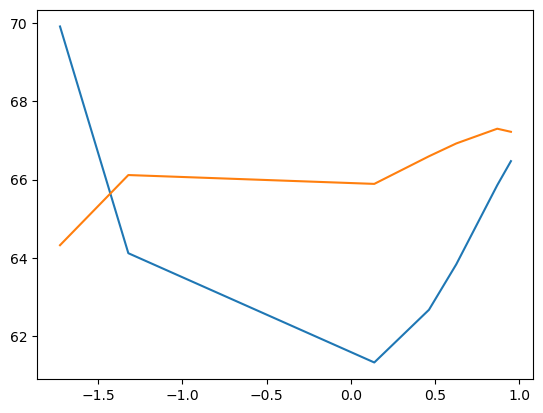

In [4]:
import seaborn as plt
plt.lineplot(Xtt_scaled.flatten(),y_d.flatten())
plt.lineplot(Xtt_scaled.flatten(),y_test.flatten())

In [143]:
import math
print("RMSE:",math.sqrt((np.square(y_test-y_d).mean())))

RMSE: 3.269735764005778


In [129]:
X[35:42].shape

(7, 1)

In [154]:
del D_X[0:7]

ValueError: cannot delete array elements

In [15]:
n_samples = D_X.shape[0]
indices = np.arange(0,42)
fold_size = int(n_samples / 6)
scores = []
for i in range(6):
    start, end = i*fold_size, (i+1)*fold_size
    test_indices = indices[start:end]
    train_indices = np.concatenate((indices[:start], indices[end:]))

In [17]:
train_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [6]:
D_X

array([1998., 2008., 1975., 2004., 1980., 2002., 2007., 1979., 1992.,
       1982., 2017., 1991., 1981., 1977., 1976., 1973., 2001., 1999.,
       1974., 2003., 2005., 1993., 1988., 1994., 1997., 2018., 1989.,
       1987., 2012., 2019., 2000., 1971., 2006., 1970., 2021., 2014.,
       1986., 1984., 1978., 1996., 2015., 2020.])